<a href="https://colab.research.google.com/github/yceffort/pytorch-study/blob/master/02_4)_multi_layer_perception_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
from google.colab import files
upload = files.upload()

Saving ta_20190128205219.csv to ta_20190128205219.csv


In [11]:
upload.keys()

dict_keys(['ta_20190128205219.csv'])

In [0]:
import io

string_csv = io.StringIO(upload['ta_20190128205219.csv'].decode('euc-kr'))
data = pd.read_csv(string_csv, skiprows=[0, 1, 2, 3, 4, 5])

In [13]:
data.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2009-01-01,108,-5.8,-9.5,-2.5
1,2009-01-02,108,-2.8,-6.9,1.2
2,2009-01-03,108,-1.0,-5.6,4.0
3,2009-01-04,108,0.4,-2.8,4.5
4,2009-01-05,108,-1.6,-3.4,1.2


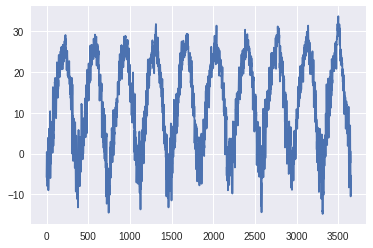

In [14]:
temp = data['평균기온(℃)']
temp.plot()
plt.show()

In [15]:
train_index = round(len(temp) * 0.8)
train_index

2922

In [0]:
train_x = temp[:train_index]
test_x = temp[train_index:]

train_x = np.array(train_x)
test_x = np.array(test_x)

In [17]:
# 윈도우 크기 (180일, 6개월)
WINDOW_SIZE = 180

tmp = []
train_X = []

for i in range(0, len(train_x) - WINDOW_SIZE):
  tmp.append(train_x[i:i+WINDOW_SIZE])

train_X = np.array(tmp)

pd.DataFrame(train_X).head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-5.8,-2.8,-1.0,0.4,-1.6,-2.0,-0.5,-0.9,-3.5,-7.5,...,22.7,25.1,23.0,23.4,24.5,24.8,24.4,26.1,26.0,26.1
1,-2.8,-1.0,0.4,-1.6,-2.0,-0.5,-0.9,-3.5,-7.5,-8.0,...,25.1,23.0,23.4,24.5,24.8,24.4,26.1,26.0,26.1,24.4
2,-1.0,0.4,-1.6,-2.0,-0.5,-0.9,-3.5,-7.5,-8.0,-7.8,...,23.0,23.4,24.5,24.8,24.4,26.1,26.0,26.1,24.4,23.5
3,0.4,-1.6,-2.0,-0.5,-0.9,-3.5,-7.5,-8.0,-7.8,-5.5,...,23.4,24.5,24.8,24.4,26.1,26.0,26.1,24.4,23.5,20.7
4,-1.6,-2.0,-0.5,-0.9,-3.5,-7.5,-8.0,-7.8,-5.5,-6.6,...,24.5,24.8,24.4,26.1,26.0,26.1,24.4,23.5,20.7,22.5


In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    
    self.fc1 = nn.Linear(180, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 128)
    self.fc4 = nn.Linear(128, 180)
    
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    
    return x;
  
model = Net()

In [23]:
criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(1000):
  
  total_loss = 0
  d = []
  
  for i in range(100):
    index = np.random.randint(0, 1281)
    
    d.append(train_X[index])
    
  d = np.array(d, dtype='float32')
  d = Variable(torch.from_numpy(d))
  
  optimizer.zero_grad()
  
  output = model(d)
  
  loss = criterion(output, d)
  
  loss.backward()
  
  optimizer.step()
  
  total_loss += loss.data.item()
  
  if (epoch+1) % 100 == 0:
    print(epoch+1, total_loss)

100 9.88106632232666
200 9.357300758361816
300 9.327717781066895
400 8.321449279785156
500 7.5223541259765625
600 7.002117156982422
700 6.586050033569336
800 6.0552496910095215
900 5.273303985595703
1000 5.39844274520874


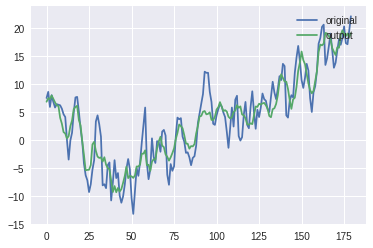

In [24]:
plt.plot(d.data[0].numpy(), label='original')
plt.plot(output.data[0].numpy(), label='output')
plt.legend(loc='upper right')
plt.show()

In [36]:
730 / 180

4.055555555555555

In [40]:
tmp = []
test_X = []

tmp.append(test_x[0:180])
tmp.append(test_x[180:360])
tmp.append(test_x[360:540])
tmp.append(test_x[540:720])

test_X = np.array(tmp, dtype='float32')

pd.DataFrame(test_X)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,2.7,5.000000,2.000000,3.900000,3.800000,5.4,4.6,6.5,1.5,-3.700000,...,26.000000,25.4,25.299999,26.700001,24.5,23.799999,23.100000,25.200001,26.0,26.200001
1,25.9,25.299999,24.299999,24.700001,26.700001,27.4,27.6,26.4,26.0,26.299999,...,-6.700000,-1.6,-3.900000,-3.900000,-0.9,3.400000,6.100000,2.900000,-2.1,-3.800000
2,-6.9,-2.100000,2.100000,1.400000,-0.300000,-1.3,-1.8,-4.7,-4.7,-3.000000,...,21.700001,22.5,22.799999,24.799999,22.4,22.700001,23.700001,25.000000,24.5,25.200001
3,27.1,22.299999,22.299999,23.299999,24.700001,24.4,21.9,22.6,27.4,27.299999,...,-1.900000,-2.2,-4.400000,-2.400000,0.0,1.600000,2.600000,4.000000,3.4,5.600000


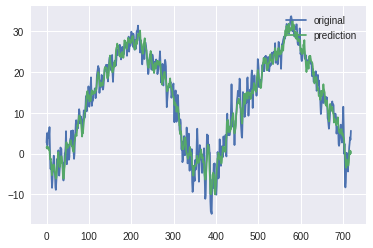

In [42]:
d = Variable(torch.from_numpy(test_X))
output = model(d)

plt.plot(test_X.flatten(), label='original')
plt.plot(output.data.numpy().flatten(), label='prediction')
plt.legend(loc='upper right')
plt.show()

In [45]:
test = test_X.flatten()
pred = output.data.numpy().flatten()

total_score = []
for i in range(0, 720):
  dist = (test[i] - pred[i])
  score = pow(dist, 2)
  total_score.append(score)
  
total_score = np.array(total_score)
max_score = np.max(total_score)
total_score = total_score / max_score

total_score

array([1.93946729e-02, 1.31139284e-01, 8.44757540e-03, 8.05309235e-02,
       6.14535470e-02, 1.94746702e-01, 1.81391707e-01, 4.07204407e-01,
       8.00653742e-02, 6.29057480e-02, 8.57470834e-02, 4.18611138e-03,
       4.39967391e-02, 1.24557914e-01, 7.00245533e-02, 5.58702514e-05,
       6.18147831e-03, 1.62956368e-01, 3.48484369e-02, 4.72080081e-03,
       6.14524196e-03, 8.78437179e-02, 9.77804591e-02, 1.34019837e-02,
       7.40494942e-03, 7.42925351e-02, 1.32769618e-02, 3.26952445e-02,
       2.19687940e-03, 1.51104333e-01, 1.45699888e-01, 6.39168142e-03,
       4.81540796e-04, 2.01707471e-01, 7.53241649e-02, 4.34419728e-02,
       4.35266563e-03, 1.13522576e-04, 5.33843061e-02, 8.22720693e-03,
       2.94235831e-03, 2.09284745e-02, 3.34866939e-02, 1.16939432e-01,
       3.84763104e-02, 5.50135246e-02, 2.06750824e-01, 5.19933592e-02,
       2.21280401e-01, 9.77769004e-03, 1.08131555e-01, 6.95294401e-02,
       7.93436471e-05, 1.75040034e-01, 1.07654115e-01, 2.80204448e-05,
      

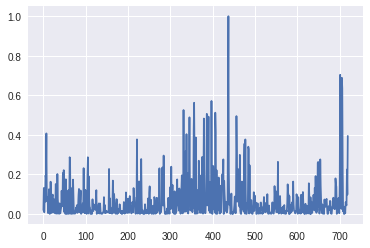

In [46]:
plt.plot(total_score)
plt.show()